<a href="https://colab.research.google.com/github/tayyabaarooj/fyp/blob/main/SkinCancerClassificationAlexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_ds="/content/drive/MyDrive/dataset/skinCancer/train"
test_ds="/content/drive/MyDrive/dataset/skinCancer/test"


# Data preprocessing
****

In [4]:
os.listdir('/content/drive/MyDrive/dataset/skinCancer/train')

['benign', 'malignant']

In [5]:
batch_size=32
img_size=224

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2467 images belonging to 2 classes.
Found 519 images belonging to 2 classes.


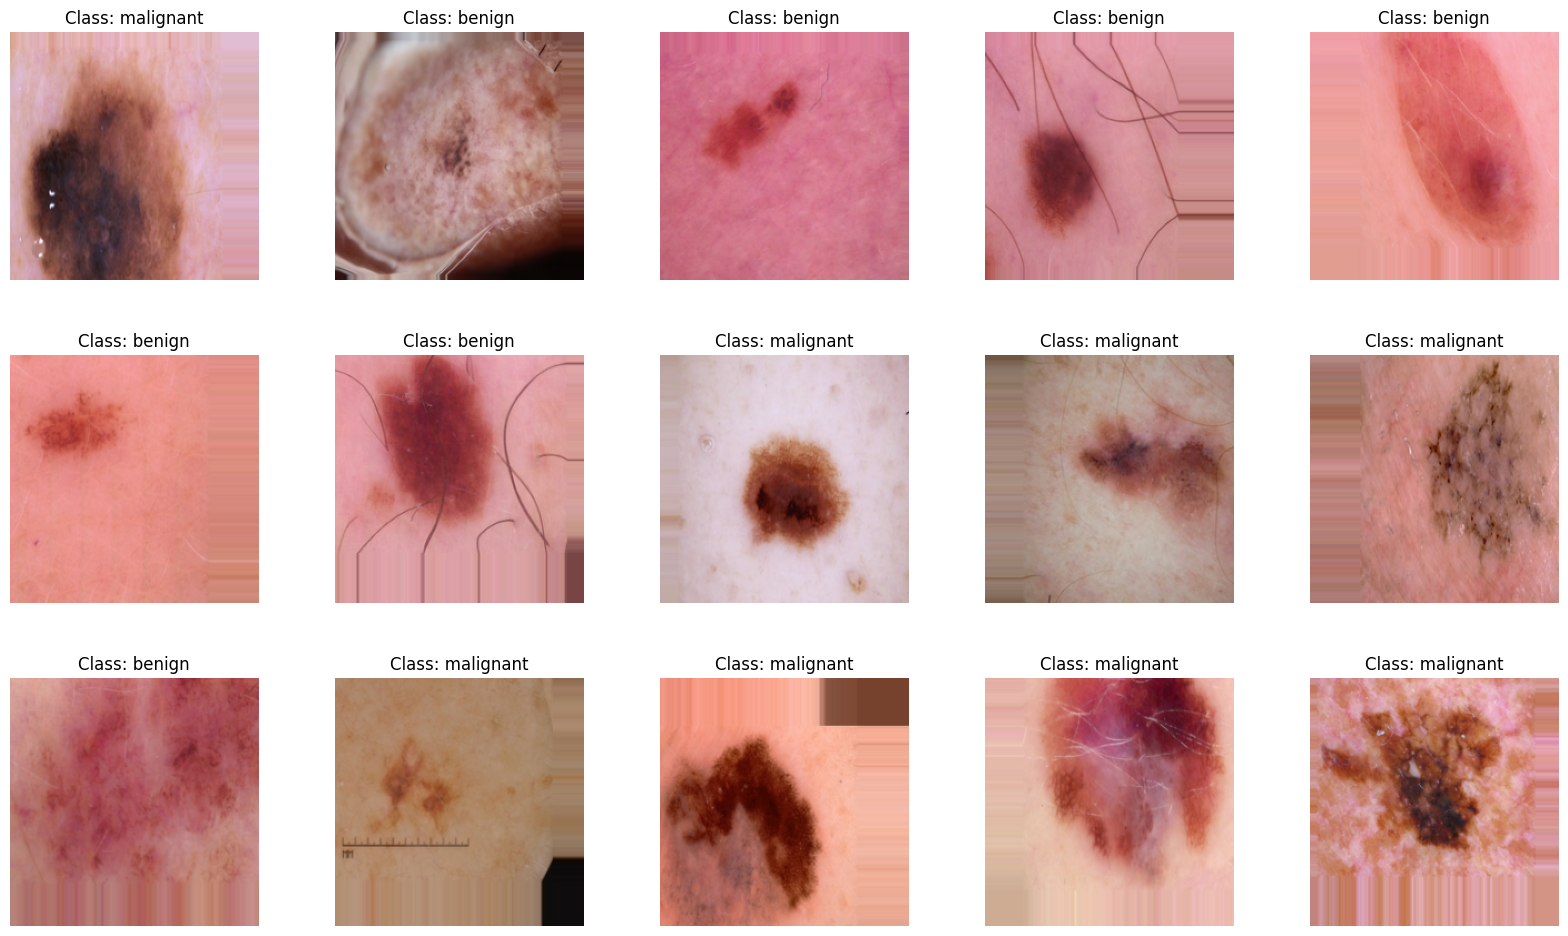

In [7]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [8]:
print(len(train_generator))
print(len(test_ds))


78
46


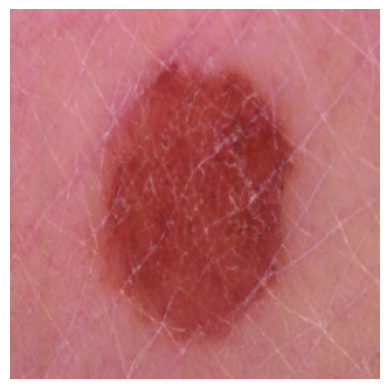

In [9]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/dataset/skinCancer/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
from keras.layers import MaxPool2D

In [11]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build ALEXNET Model

In [12]:
from keras.layers import MaxPool2D

In [13]:
from keras.layers import MaxPool2D

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define input shape
input_shape = (img_size, img_size, 3)

# Create a Sequential model
model = Sequential([
    Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding="valid", activation="relu", input_shape=input_shape),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="valid"),
    Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="valid"),
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"),
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="valid"),
    Flatten(),
    Dense(units=4096, activation="relu"),
    Dropout(0.5),
    Dense(units=4096, activation="relu"),
    Dropout(0.5),
    Dense(units=2, activation="softmax")
])

#   Model summary

In [15]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [18]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=test_generator)


Epoch 1/5
78/78 [==============================] - 755s 10s/step - loss: 0.6717 - accuracy: 0.5630 - val_loss: 0.6369 - val_accuracy: 0.5877
Epoch 2/5
78/78 [==============================] - 432s 6s/step - loss: 0.5215 - accuracy: 0.7471 - val_loss: 0.4554 - val_accuracy: 0.8131
Epoch 3/5
78/78 [==============================] - 441s 6s/step - loss: 0.4460 - accuracy: 0.7835 - val_loss: 0.4133 - val_accuracy: 0.8208
Epoch 4/5
78/78 [==============================] - 422s 5s/step - loss: 0.4522 - accuracy: 0.7758 - val_loss: 0.4107 - val_accuracy: 0.8150
Epoch 5/5
78/78 [==============================] - 428s 5s/step - loss: 0.4272 - accuracy: 0.7937 - val_loss: 0.4531 - val_accuracy: 0.7958


In [19]:
n_categories = len(os.listdir('/content/drive/MyDrive/dataset/skinCancer/test'))# number of categories print(n_categories)

In [20]:
n_categories

2

In [21]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.671729,0.563032,0.636876,0.587669
1,0.521460,0.747061,0.455429,0.813102
2,0.446021,0.783543,0.413326,0.820809
3,0.452209,0.775841,0.410732,0.815029
4,0.427191,0.793677,0.453072,0.795761


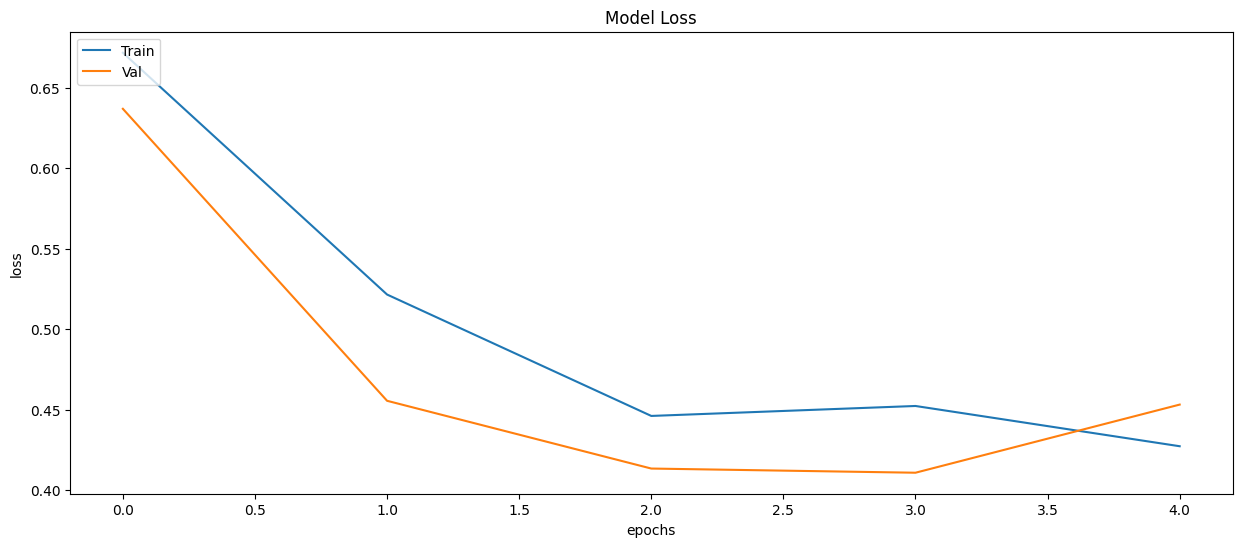

In [22]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

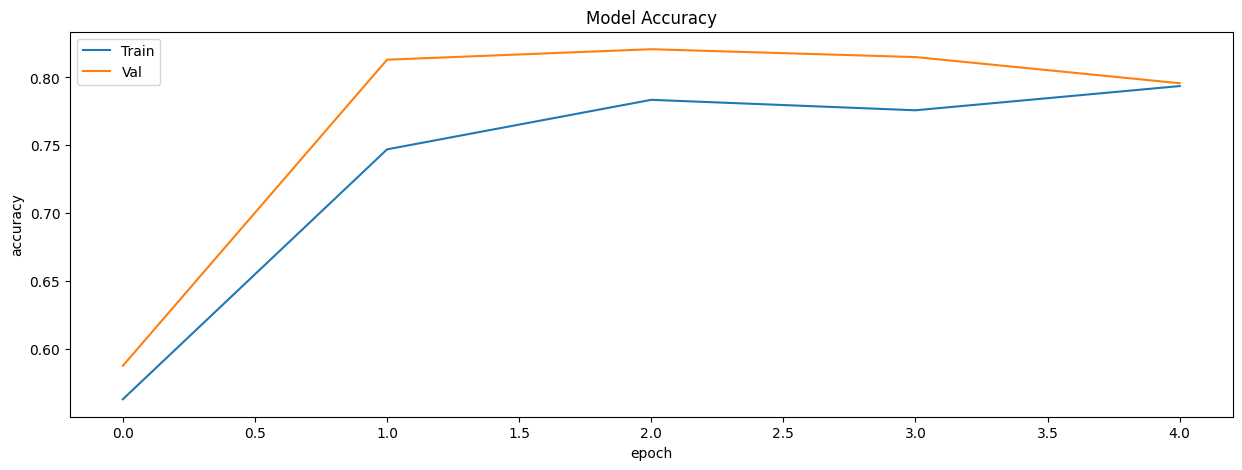

In [23]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [24]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

17/17 [==============================] - 19s 1s/step


In [25]:
results =model.evaluate(test_generator)

17/17 [==============================] - 19s 1s/step - loss: 0.4531 - accuracy: 0.7958


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.53      0.69       219
           1       0.74      0.99      0.85       300

    accuracy                           0.80       519
   macro avg       0.86      0.76      0.77       519
weighted avg       0.84      0.80      0.78       519



7/7 [==============================] - 7s 940ms/step


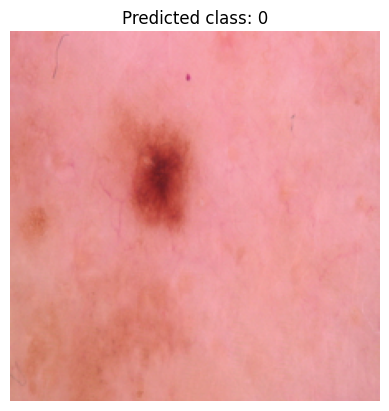

In [27]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/dataset/skinCancer/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [28]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : benign
Class probability: 0.7816842
Predicted class for 2.jpg : benign
Class probability: 0.98060226
Predicted class for 3.jpg : benign
Class probability: 0.5942454
Predicted class for 4.jpg : malignant
Class probability: 0.53723323
Predicted class for 5.jpg : malignant
Class probability: 0.5079287
Predicted class for 6.jpg : benign
Class probability: 0.85533345
Predicted class for 7.jpg : malignant
Class probability: 0.632746
Predicted class for 8.jpg : benign
Class probability: 0.82369167
Predicted class for 9.jpg : benign
Class probability: 0.85671663
Predicted class for 10.jpg : benign
Class probability: 0.9310216
Predicted class for 11.jpg : malignant
Class probability: 0.64654815
Predicted class for 12.jpg : benign
Class probability: 0.9366331
Predicted class for 13.jpg : malignant
Class probability: 0.8228918
Predicted class for 14.jpg : malignant
Class probability: 0.68911016
Predicted class for 15.jpg : malignant
Class probability: 0.7979869
Predict

# Thank You !